<a href="https://colab.research.google.com/github/avishekism/testproject/blob/master/Newflash_KNN_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('newflash.csv')

In [ ]:
print(df.shape)


(5002, 8)


In [ ]:
df = df[['frame#', 'Prot_CA']]

In [ ]:
df = df.dropna(axis=0)

In [ ]:
wcss = []

In [ ]:
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)

In [ ]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
ax = sns.lineplot(x = ks , y = wcss);
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("(WCSS) for each number of clusters")

ValueError: ignored

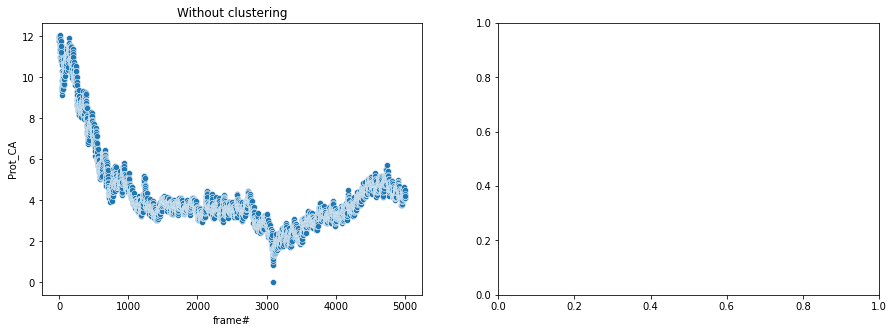

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='frame#', y='Prot_CA').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='frame#', y='Prot_CA', hue=clustering.labels_ , palette=['green','orange','brown','dodgerblue','red','black','lime','pink','magenta','aqua','teal']).set_title('Using the elbow method');

In [ ]:
df.describe().T 

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(df)

In [ ]:
wcss_sc = []

for i in range(1, 4):
    clustering_sc = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering_sc.fit(scaled)
    wcss_sc.append(clustering_sc.inertia_)
    
ks = [1, 2, 3]
ax = sns.lineplot(x = ks, y = wcss_sc);
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("(WCSS) for each number of clusters")
ax.set_title("After reducing the data with Standard Scaler")

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='frame#', y='Prot_CA').set_title('Without cliustering')
sns.scatterplot(ax=axes[1], data=df, x='frame#', y='Prot_CA', hue=clustering.labels_).set_title('With the Elbow method')
sns.scatterplot(ax=axes[2], data=df, x='frame#', y='Prot_CA', hue=clustering_sc.labels_,palette="YlOrBr").set_title('With the Elbow method and scaled data');

In [ ]:
K=3

Centroids = (df.sample(n=K))

In [ ]:
import numpy as np

In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=df
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["frame#"]-row_d["frame#"])**2
            d2=(row_c["Prot_CA"]-row_d["Prot_CA"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1
    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    Centroids_new = df.groupby(["Cluster"]).mean()[["Prot_CA","frame#"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Prot_CA'] - Centroids['Prot_CA']).sum() + (Centroids_new['frame#'] - Centroids['frame#']).sum()
        print(diff.sum())
    Centroids = df.groupby(["Cluster"]).mean()[["Prot_CA","frame#"]]

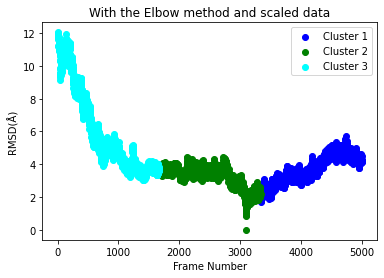

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=df[df["Cluster"]==k+1]
    plt.scatter(data["frame#"],data["Prot_CA"],c=color[k])
###plt.scatter(Centroids["frame#"],Centroids["Prot_CA"],c='red')
plt.xlabel('Frame Number')
plt.ylabel('RMSD(Å)')
plt.legend(['Cluster 2', 'Cluster 1','Cluster 3'], loc='upper right')
plt.title('With the Elbow method and scaled data')
plt.show()

In [ ]:
print(Centroids["frame#"],Centroids["Prot_CA"])